In [44]:
%pip install numpy scikit-learn matplotlib pandas


1638.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


You should consider upgrading via the '/Users/hrntsm/Desktop/TunnyHandson/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np
import pandas
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


# データの作成


In [46]:
true_w1 = 1.5
true_w2 = 0.8


In [47]:
N = 10
x_data = np.random.uniform(-5, 5, size=N)
y_data = true_w1 * x_data + true_w2 + np.random.normal(0, 1, size=N)


# 線形回帰


In [56]:
lr = LinearRegression()
lr.fit(x_data.reshape(N, 1), y_data.reshape(N, 1))
print(lr.coef_)
print(lr.intercept_)


[[1.64253776]]
[0.81162327]


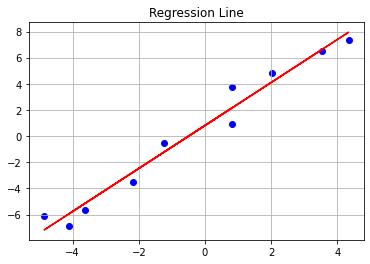

In [50]:
plt.scatter(x_data, y_data, color='blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(x_data, lr.predict(x_data.reshape(N, 1)), color='red')  # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.grid()                                 # グリッド線を表示

plt.show()


# ベイズ線形回帰

参考

- [PyMC3 を使った Python ベイズ推定超入門（その 3）ベイズ型線形回帰モデルを作ってみよう！](https://www.salesanalytics.co.jp/datascience/datascience110/)
- [Python で始めるベイズ機械学習入門](https://www.kspub.co.jp/book/detail/5279786.html)


In [52]:
%pip install pymc3


2893.08s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


You should consider upgrading via the '/Users/hrntsm/Desktop/TunnyHandson/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [58]:
import pymc3 as pm
import arviz as az


In [61]:
with pm.Model() as model:
    x = pm.Data('x', x_data)
    w1 = pm.Normal('w1', mu=0.0, sigma=10.0)
    w2 = pm.Normal('w2', mu=0.0, sigma=10.0)
    y = pm.Normal('y', mu=w1 * x + w2, sigma=1.0, observed=y_data)

with model:
    trace = pm.sample(3000, tune=1000, chains=3, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [w2, w1]


/Users/hrntsm/Desktop/TunnyHandson/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hrntsm/Desktop/TunnyHandson/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hrntsm/Desktop/TunnyHandson/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 23 seconds.


array([<AxesSubplot:title={'center':'w1'}>,
       <AxesSubplot:title={'center':'w2'}>], dtype=object)

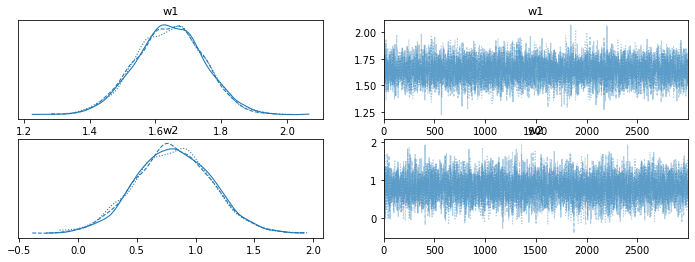

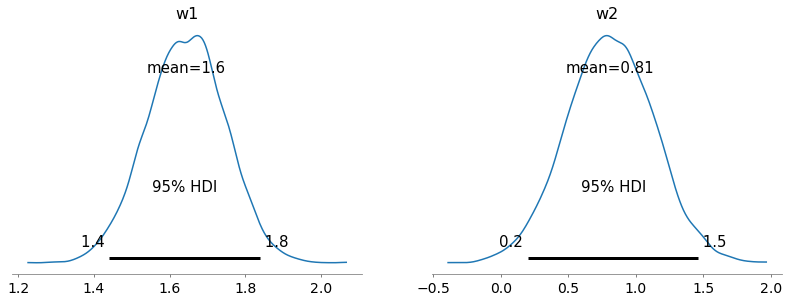

In [64]:
az.plot_trace(trace)
az.plot_posterior(trace, hdi_prob=0.95)


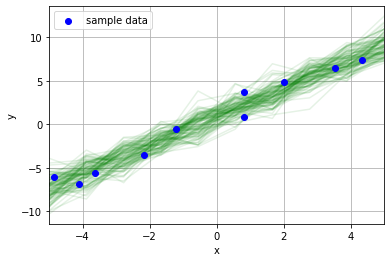

In [94]:
x_new = np.linspace(-5, 5, 10)

with model:
    pm.set_data(({'x': x_new}))

    pred = pm.sample_posterior_predictive(trace, samples=1000)

    y_predict_samples = pred['y']
    for i in range(100):
        plt.plot(x_new, y_predict_samples[i, :], color='g', alpha=0.1)

    plt.scatter(x_data, y_data, color='blue', label="sample data", zorder=i+2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-5, 5)
    plt.legend()
    plt.grid()
